In [71]:
from typing import List

mod = 10**9 + 7
class Solution:
    def numOfSubarrays(self, arr: List[int]) -> int:
        n = len(arr)
        ans = 0
        for i in range(n):
            s = 0
            for j in range(i, n):
                s += arr[j]
                if s % 2 == 1:
                    # odd sum
                    ans += 1
        return ans % mod

In [72]:
from typing import List

mod = 10**9 + 7

# using prefix sum is of no advantage here
class Solution:
    def numOfSubarrays(self, arr: List[int]) -> int:
        n = len(arr)
        ans = 0
        prefix_sum = [0] * n
        prefix_sum[0] = arr[0]
        for i in range(1, n):
            prefix_sum[i] = prefix_sum[i-1] + arr[i]
        def get_sum(i, j):
            return prefix_sum[j] - prefix_sum[i] + arr[i]
        
        for i in range(n):
            for j in range(i, n):
                s = get_sum(i,j)
                if s % 2 == 1:
                    # odd sum
                    ans += 1
        return ans % mod

In [73]:
from typing import List

mod = 10**9 + 7

# here we used the trick but of no advantage as we are still taking O(n^2)
class Solution:
    def numOfSubarrays(self, arr: List[int]) -> int:
        n = len(arr)
        prefix_sum = [0] * (n + 1)
        for i in range(1, n + 1):
            prefix_sum[i] = prefix_sum[i-1] + arr[i - 1]
        ans = 0
        for i in range(n + 1):
            tillIOdd = prefix_sum[i]%2 == 1
            for j in range(i):
                tillJOdd = prefix_sum[j]%2 == 1
                if (tillIOdd and not tillJOdd) or (not tillIOdd and tillJOdd):
                    ans += 1
        return ans % mod


![Screenshot 2023-10-04 at 11.26.34 AM.png](<attachment:Screenshot 2023-10-04 at 11.26.34 AM.png>)
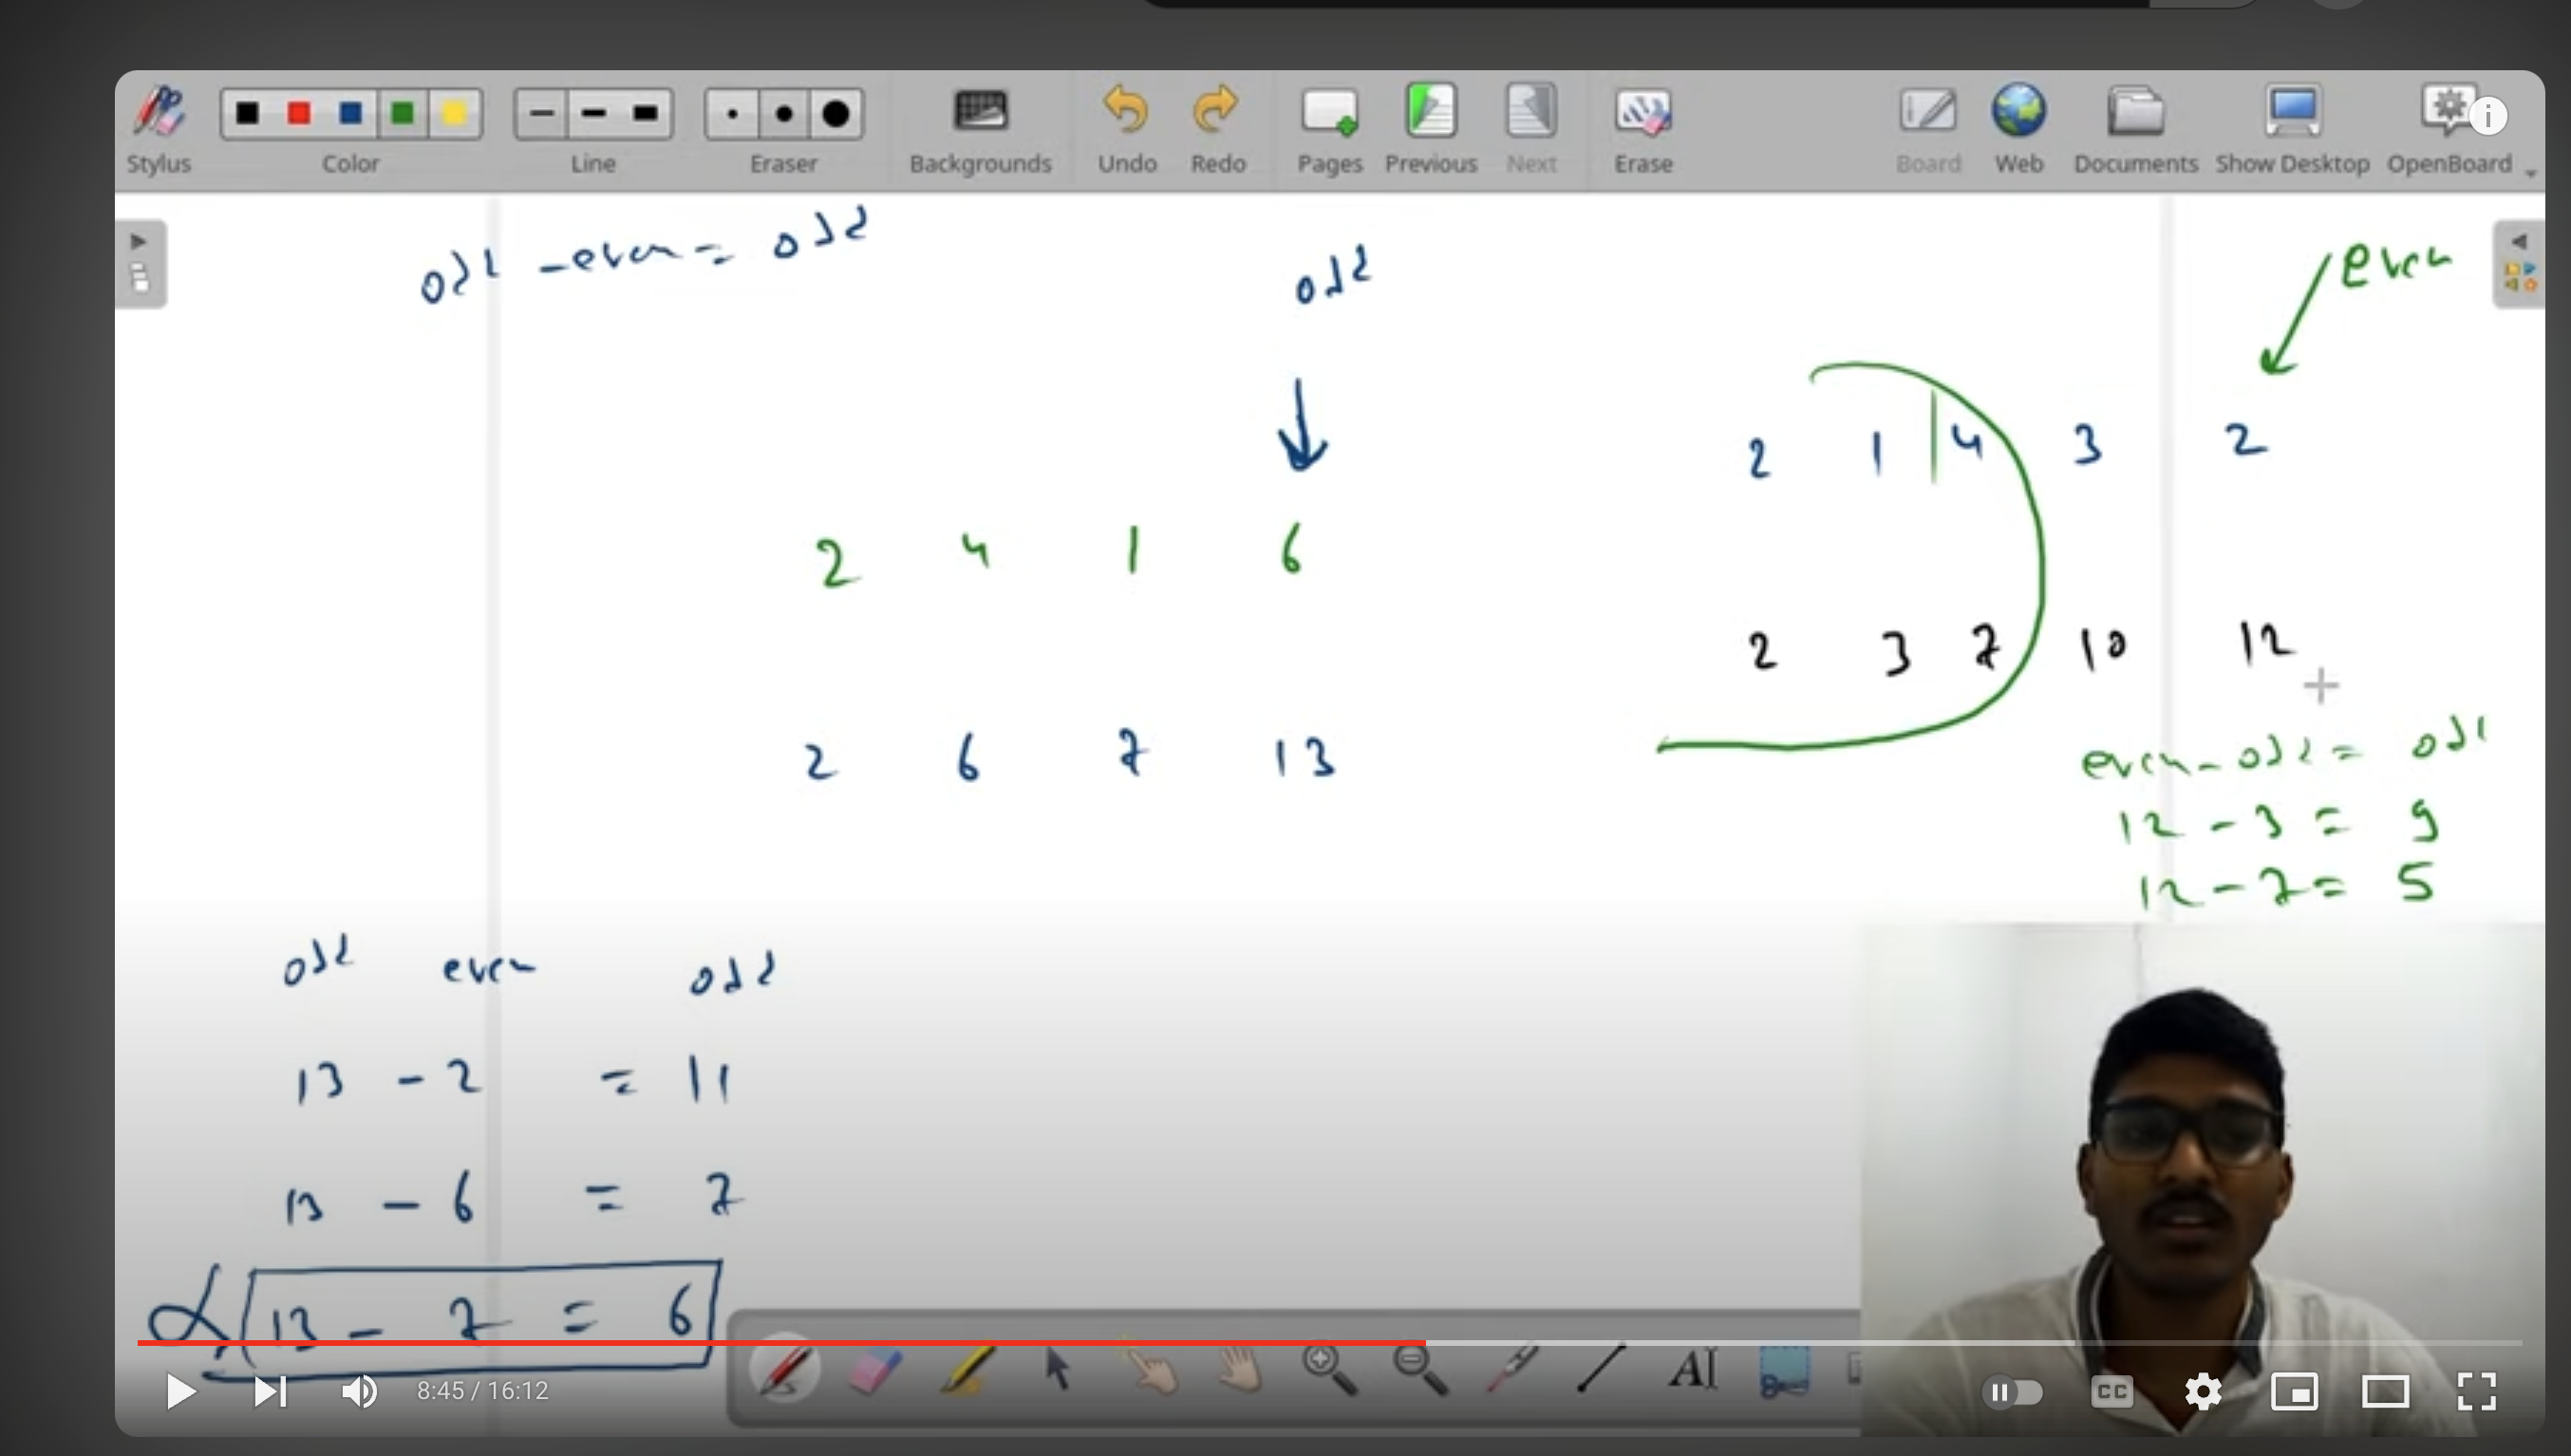

In [74]:
from typing import List

mod = 10**9 + 7

# here we keep track of odds and evens encountered and calculate ans
# while calculating the sum
class Solution:
    def numOfSubarrays(self, arr: List[int]) -> int:
        ans = 0
        s = 0
        evens = 0
        odds = 0
        for val in arr:
            s += val
            if s % 2 == 1:
                # 1 for all elements from start
                ans += 1 + evens
                odds += 1
            else:
                ans += odds
                evens += 1
        return ans % mod


In [75]:
arr = [1,3,5]
sol = Solution()
sol.numOfSubarrays(arr)

4

In [76]:
arr = [2,4,6]
sol = Solution()
sol.numOfSubarrays(arr)

0

In [77]:
arr = [1,2,3,4,5,6,7]
sol = Solution()
sol.numOfSubarrays(arr)

16